In [209]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [210]:
import os
import pickle
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.regularizers import l2

In [211]:
# Load LSA-transformed data from pickle file
with open('final_models/X_lsa.pkl', 'rb') as f:
    X_lsa = pickle.load(f)

In [212]:
df = pd.read_csv('../datasets/cleaned_datasets/cleaned_twitter_dataset_without_lemmatization.csv')
labels = df['target'].values

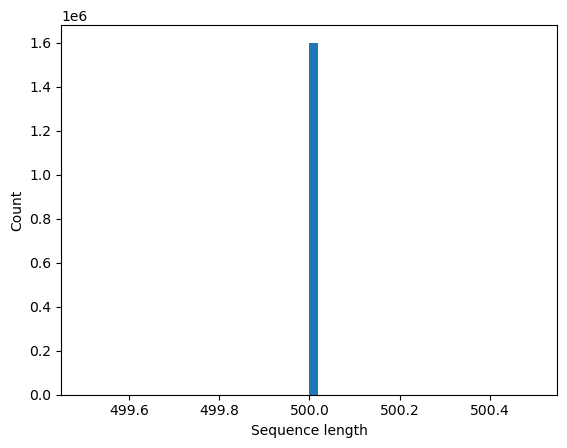

In [213]:
# Get sequence lengths
seq_lengths = [len(sequence) for sequence in X_lsa]

# Plot histogram of sequence lengths
plt.hist(seq_lengths, bins=50)
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.show()

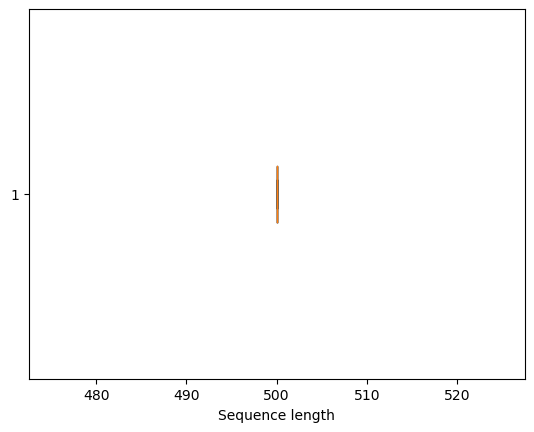

In [214]:
# Plot boxplot of sequence lengths
plt.boxplot(seq_lengths, vert=False)
plt.xlabel('Sequence length')
plt.show()

In [215]:
# Pad sequences to ensure they are all the same length
X_lsa_3d = pad_sequences(X_lsa, maxlen=100, padding='post', truncating='post')

In [216]:
# Reshape data for input into LSTM model
X_lsa_3d = np.reshape(X_lsa_3d, (X_lsa_3d.shape[0], 1, X_lsa_3d.shape[1]))

In [217]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lsa_3d, labels, test_size=0.2, random_state=42)

In [218]:
num_words = 10000  # the maximum number of words to keep in the vocabulary
embedding_dim = 128  # the dimension of the embedding space
max_sequence_length = 100  # the maximum length of a sequence

# Define the model architecture
model = Sequential()
model.add(LSTM(256, input_shape=(1, max_sequence_length), return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [219]:
# Fit the model to the training data
os.environ['TF_METAL_DEVICE_PLACEMENT'] = 'metal:0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
 2024/10000 [=====>........................] - ETA: 46s - loss: 0.6932 - accuracy: 0.5009

Process SpawnPoolWorker-214:
Process SpawnPoolWorker-210:
Process SpawnPoolWorker-211:
Process SpawnPoolWorker-209:
Process SpawnPoolWorker-215:
Process SpawnPoolWorker-213:
Process SpawnPoolWorker-212:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/multiprocessing/process.py", line 108, in run
    s

KeyboardInterrupt: 